In [3]:
from statsbombpy import sb
import pandas as pd
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
import math
tqdm.pandas() # tqdm pandas mode
import warnings
warnings.filterwarnings('ignore', category=sb.api_client.NoAuthWarning)

In [4]:
seasons = {
    'Premier League': ['2015/2016'],
    # 'La Liga': ['2014/2015', '2015/2016', '2016/2017', '2017/2018', '2018/2019', '2019/2020', '2020/2021'],
    '1. Bundesliga': ['2015/2016'],
    'Serie A': ['2015/2016'],
    'Ligue 1': ['2015/2016'],
}

In [5]:
# competitions_df = sb.competitions()
# selection = pd.Series([False] * len(competitions_df))
# for competition_name, season in seasons.items():
#     selection |= (competitions_df['competition_name'] == competition_name) & competitions_df['season_name'].isin(season)
# competitions_df = competitions_df[selection]
# competitions_df

In [6]:
# for index, row in competitions_df.iterrows():
#     to_save = sb.matches(competition_id=row['competition_id'], season_id=row['season_id'])
#     file_path = f'dataset/intersection/statsbomb_matches_shots/matches_{row["competition_name"]}_{row["season_id"]}.csv'
#     to_save.to_csv(file_path, index=False)
#     print(f'Looking at {row["competition_name"]} {row["season_name"]}')
#     file_path = f'dataset/intersection/statsbomb_matches_shots/shots_{row["competition_name"]}_{row["season_id"]}.csv'
#     if os.path.exists(file_path):
#         continue
#     shots_dfs = []
#     for match_id in tqdm(to_save['match_id']):
#         shots_dfs.append(sb.events(match_id=match_id, split=True)['shots'])
#     pd.concat(shots_dfs).reset_index(drop=True).to_csv(file_path, index=False)

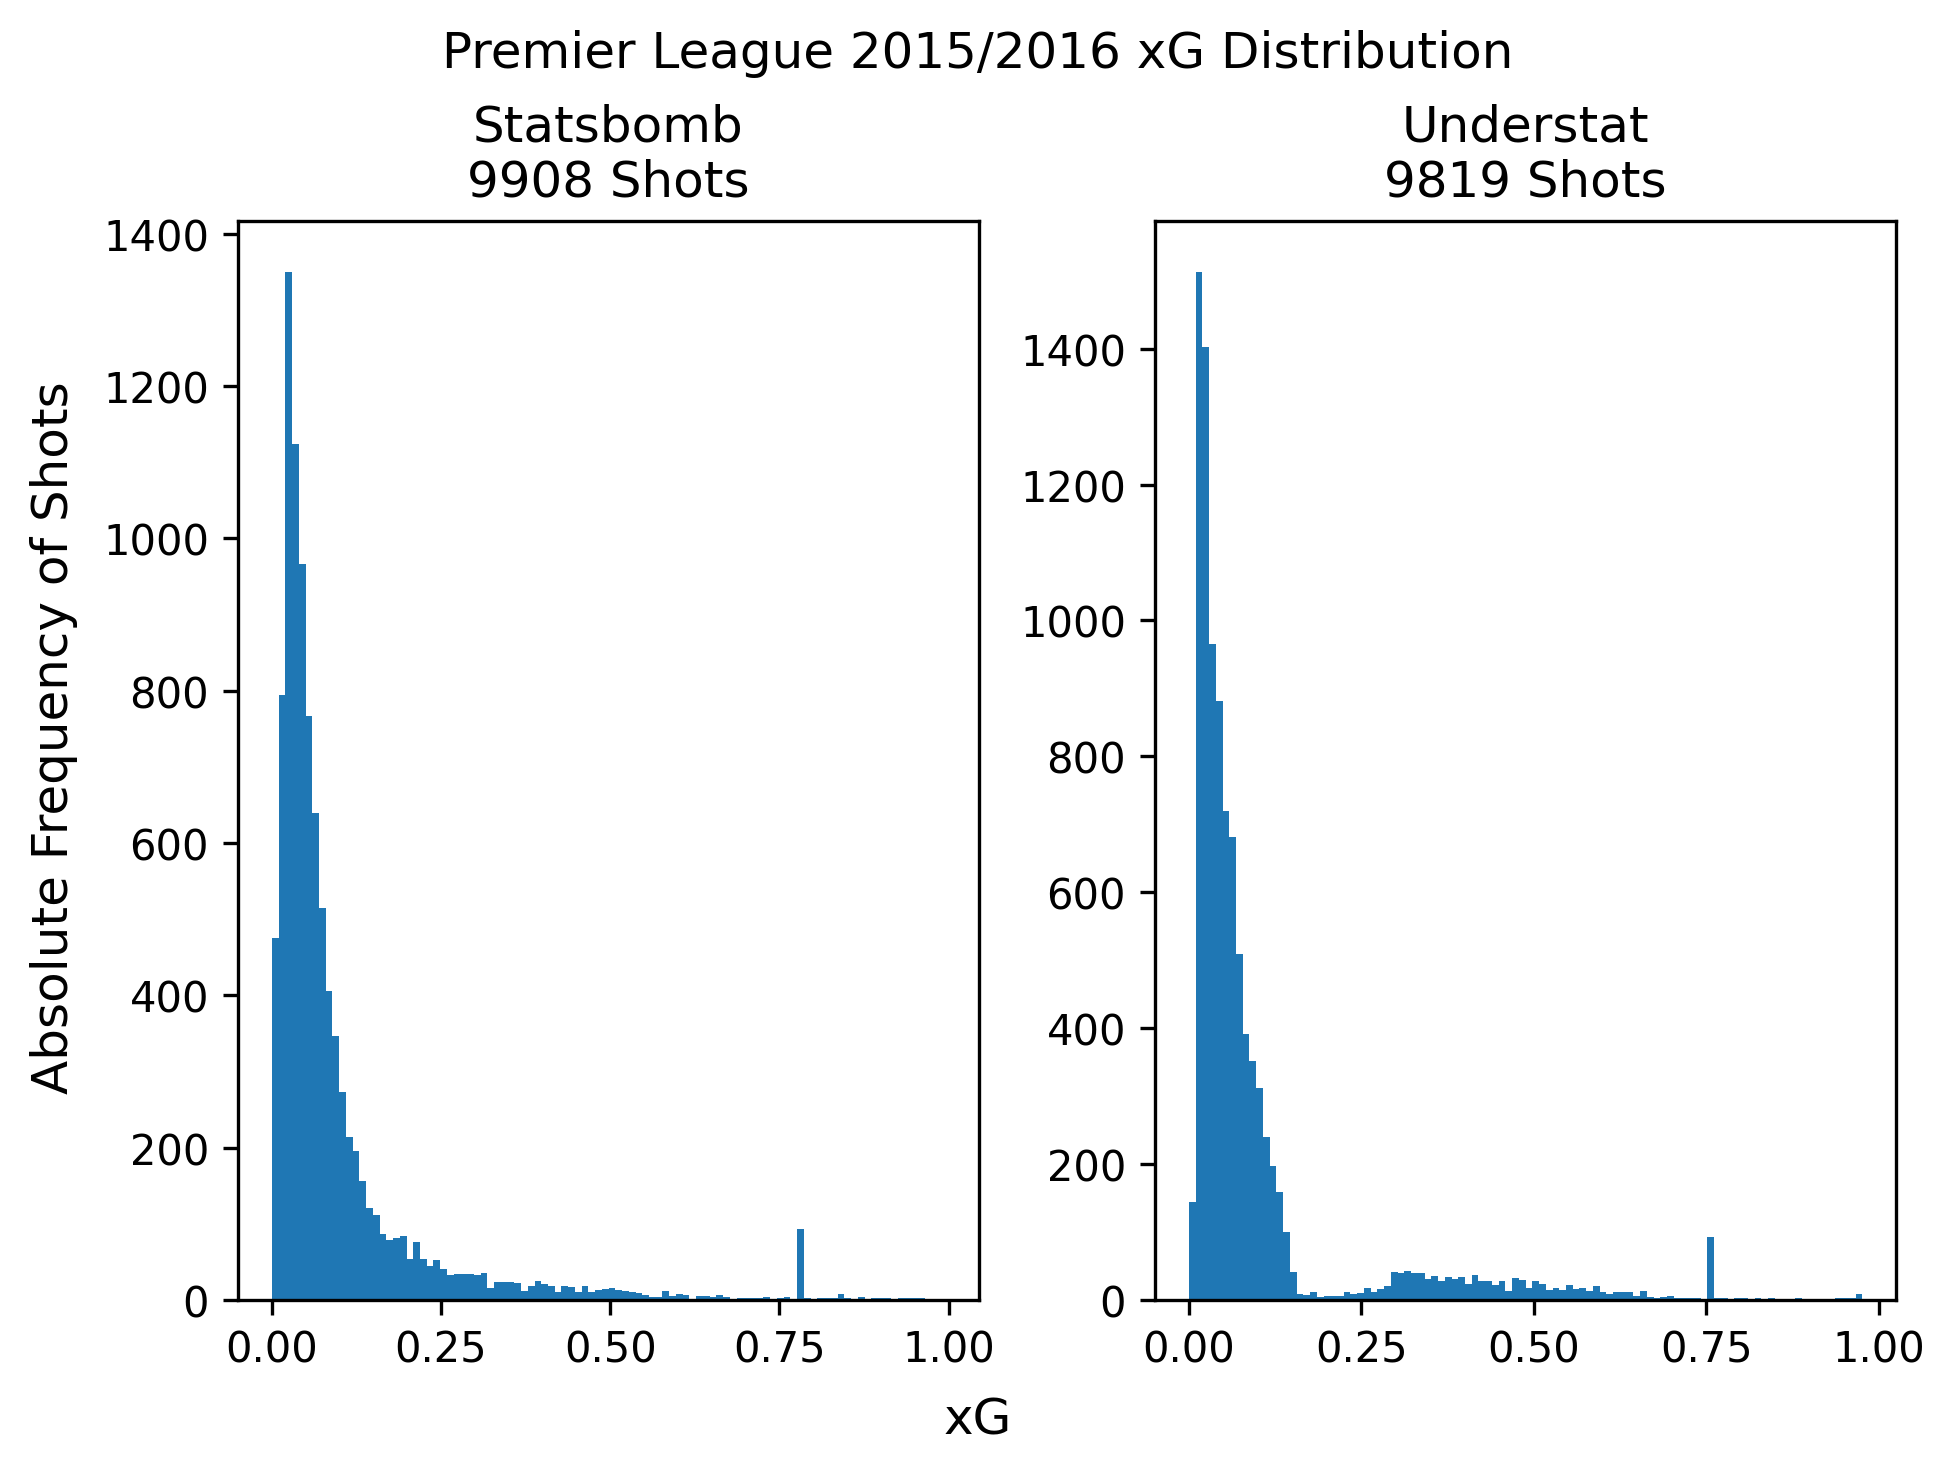

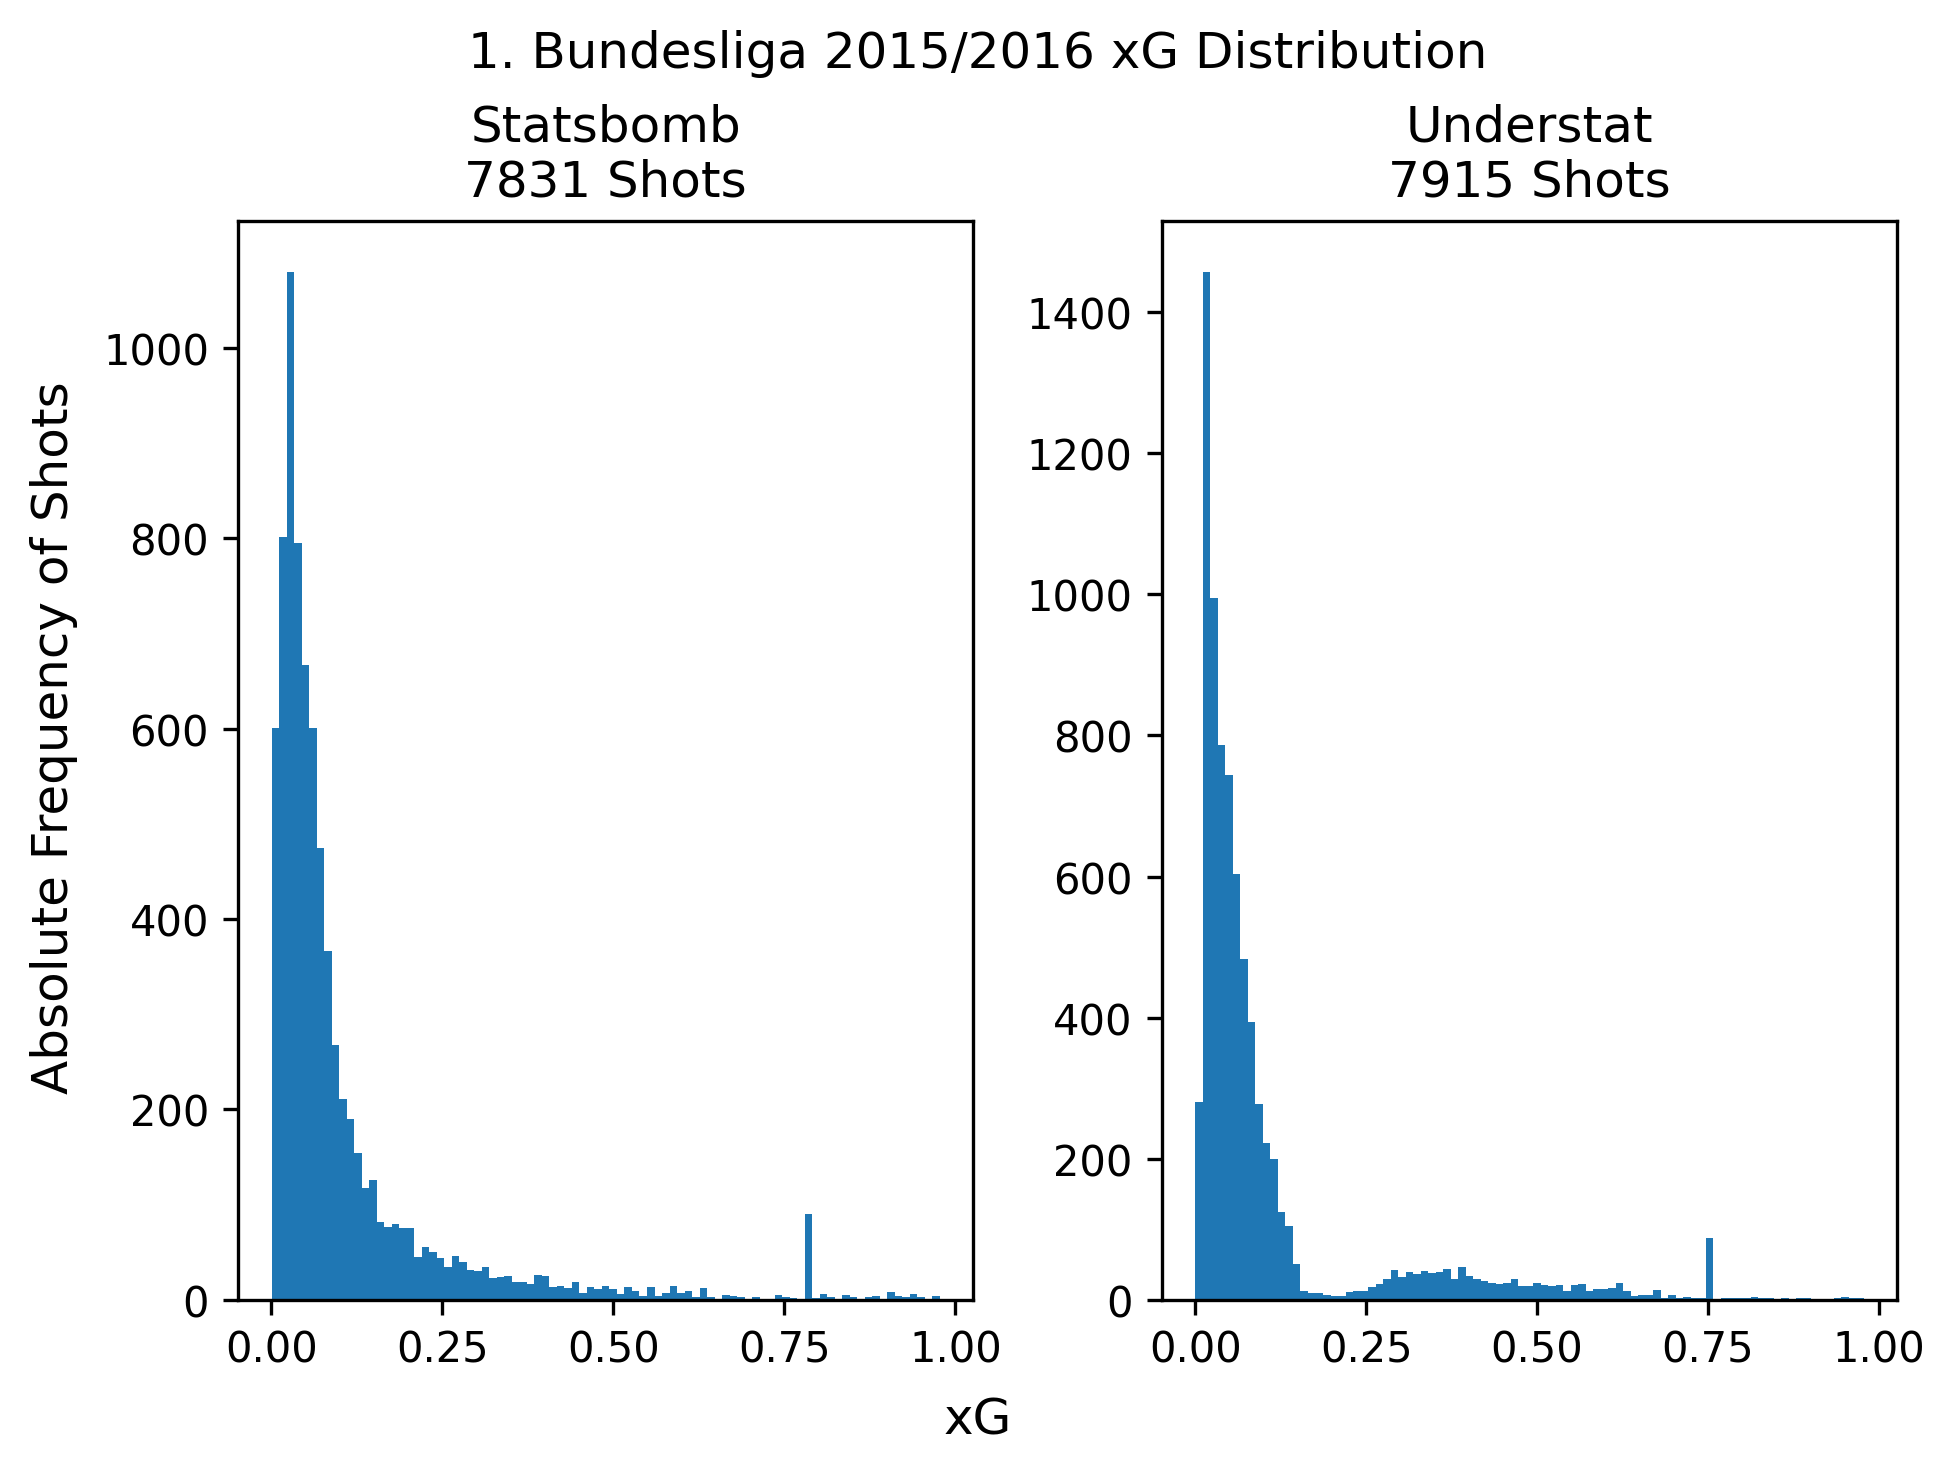

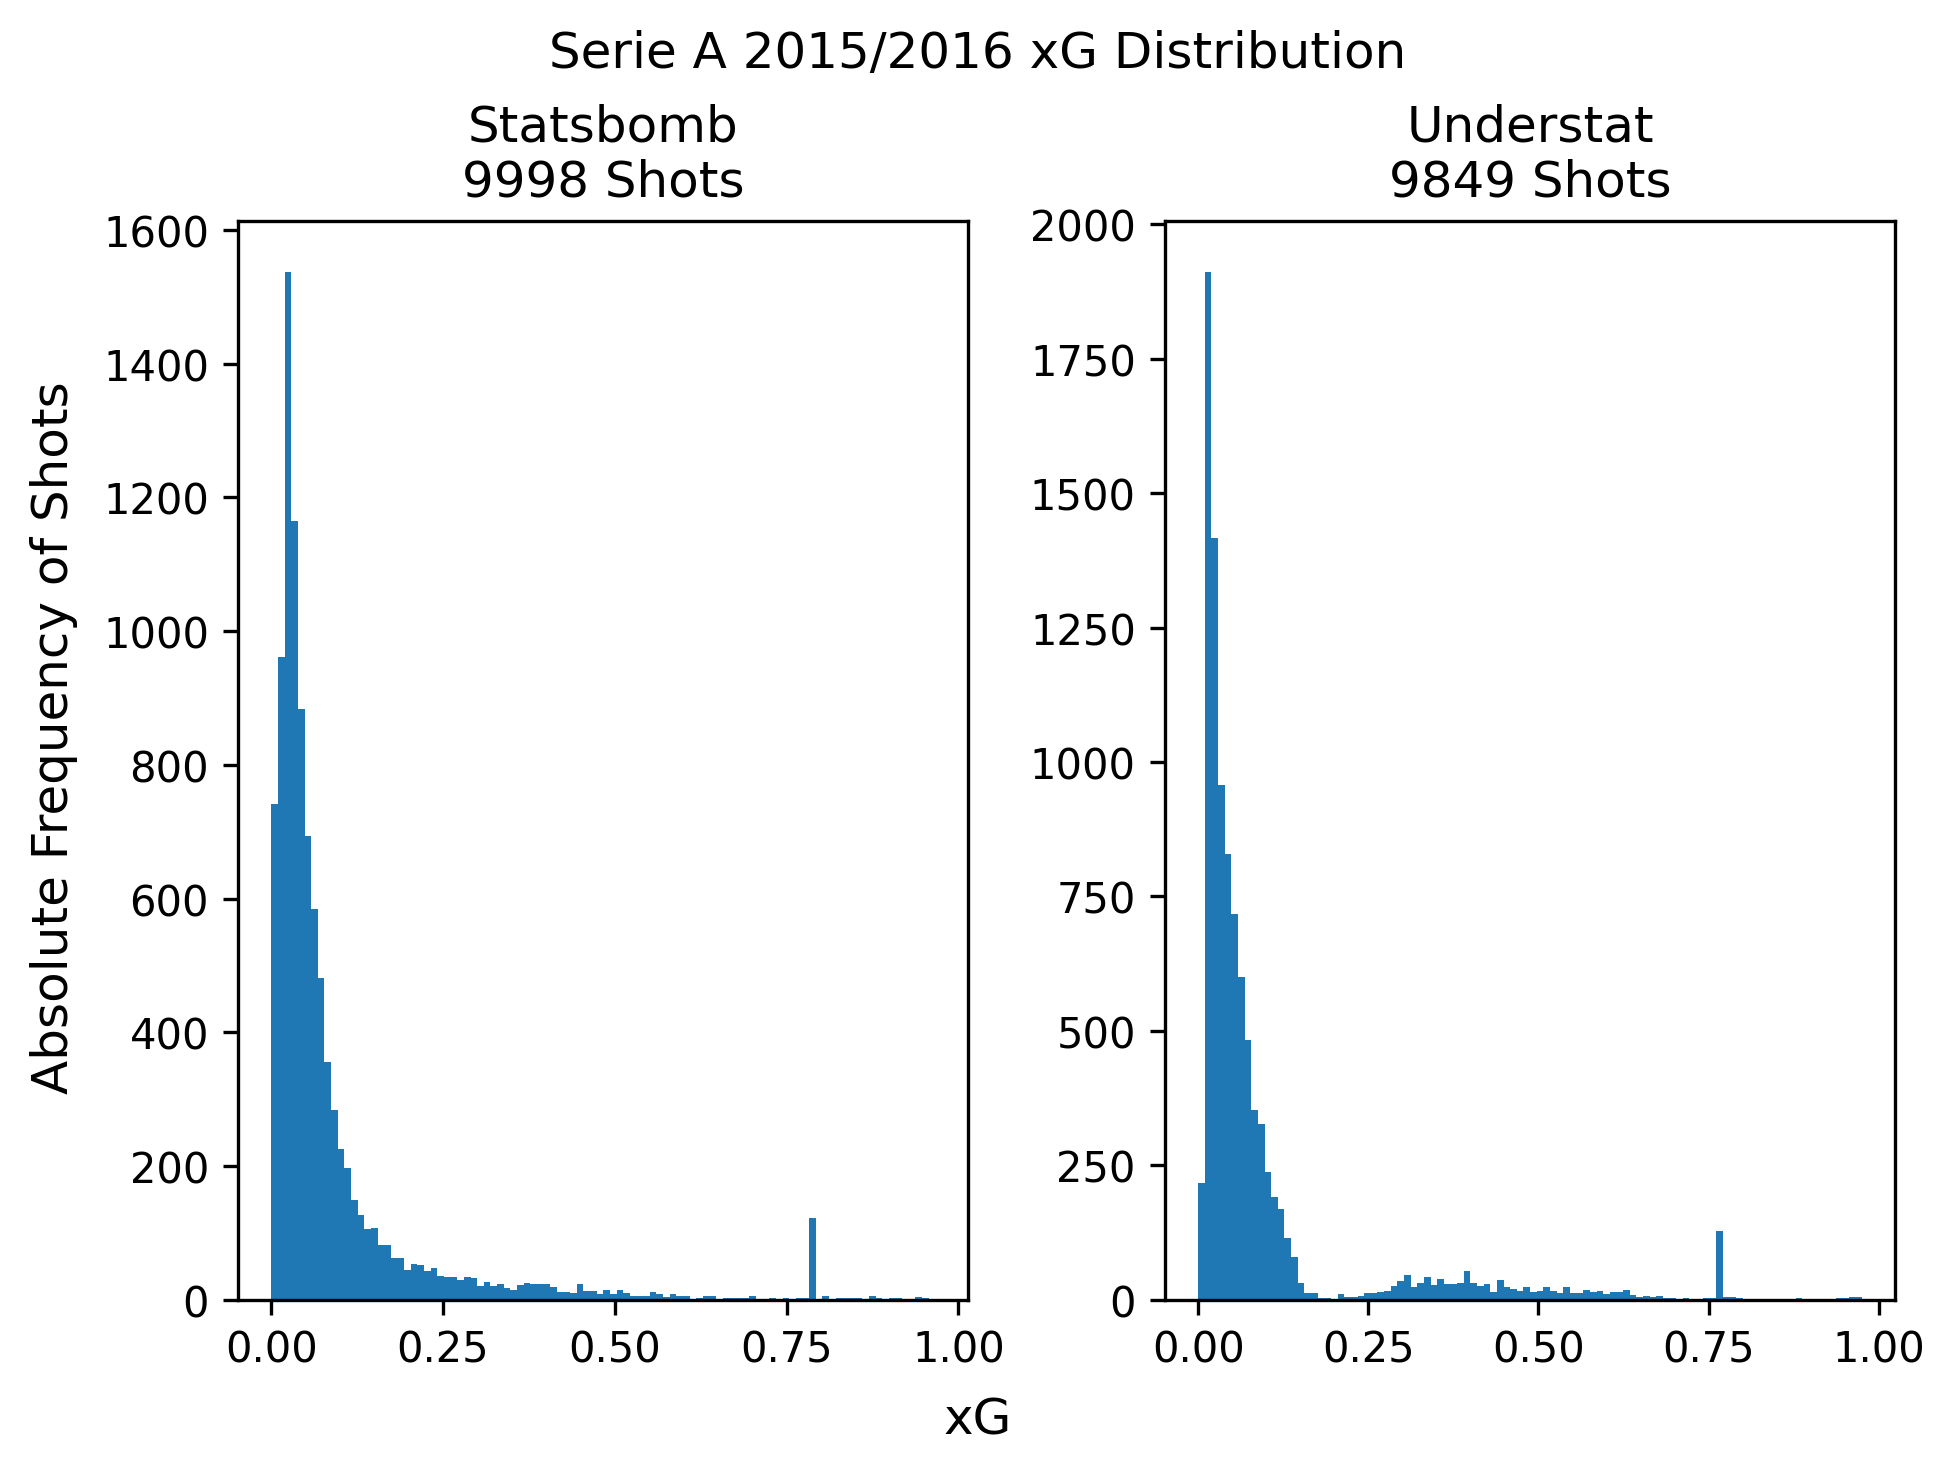

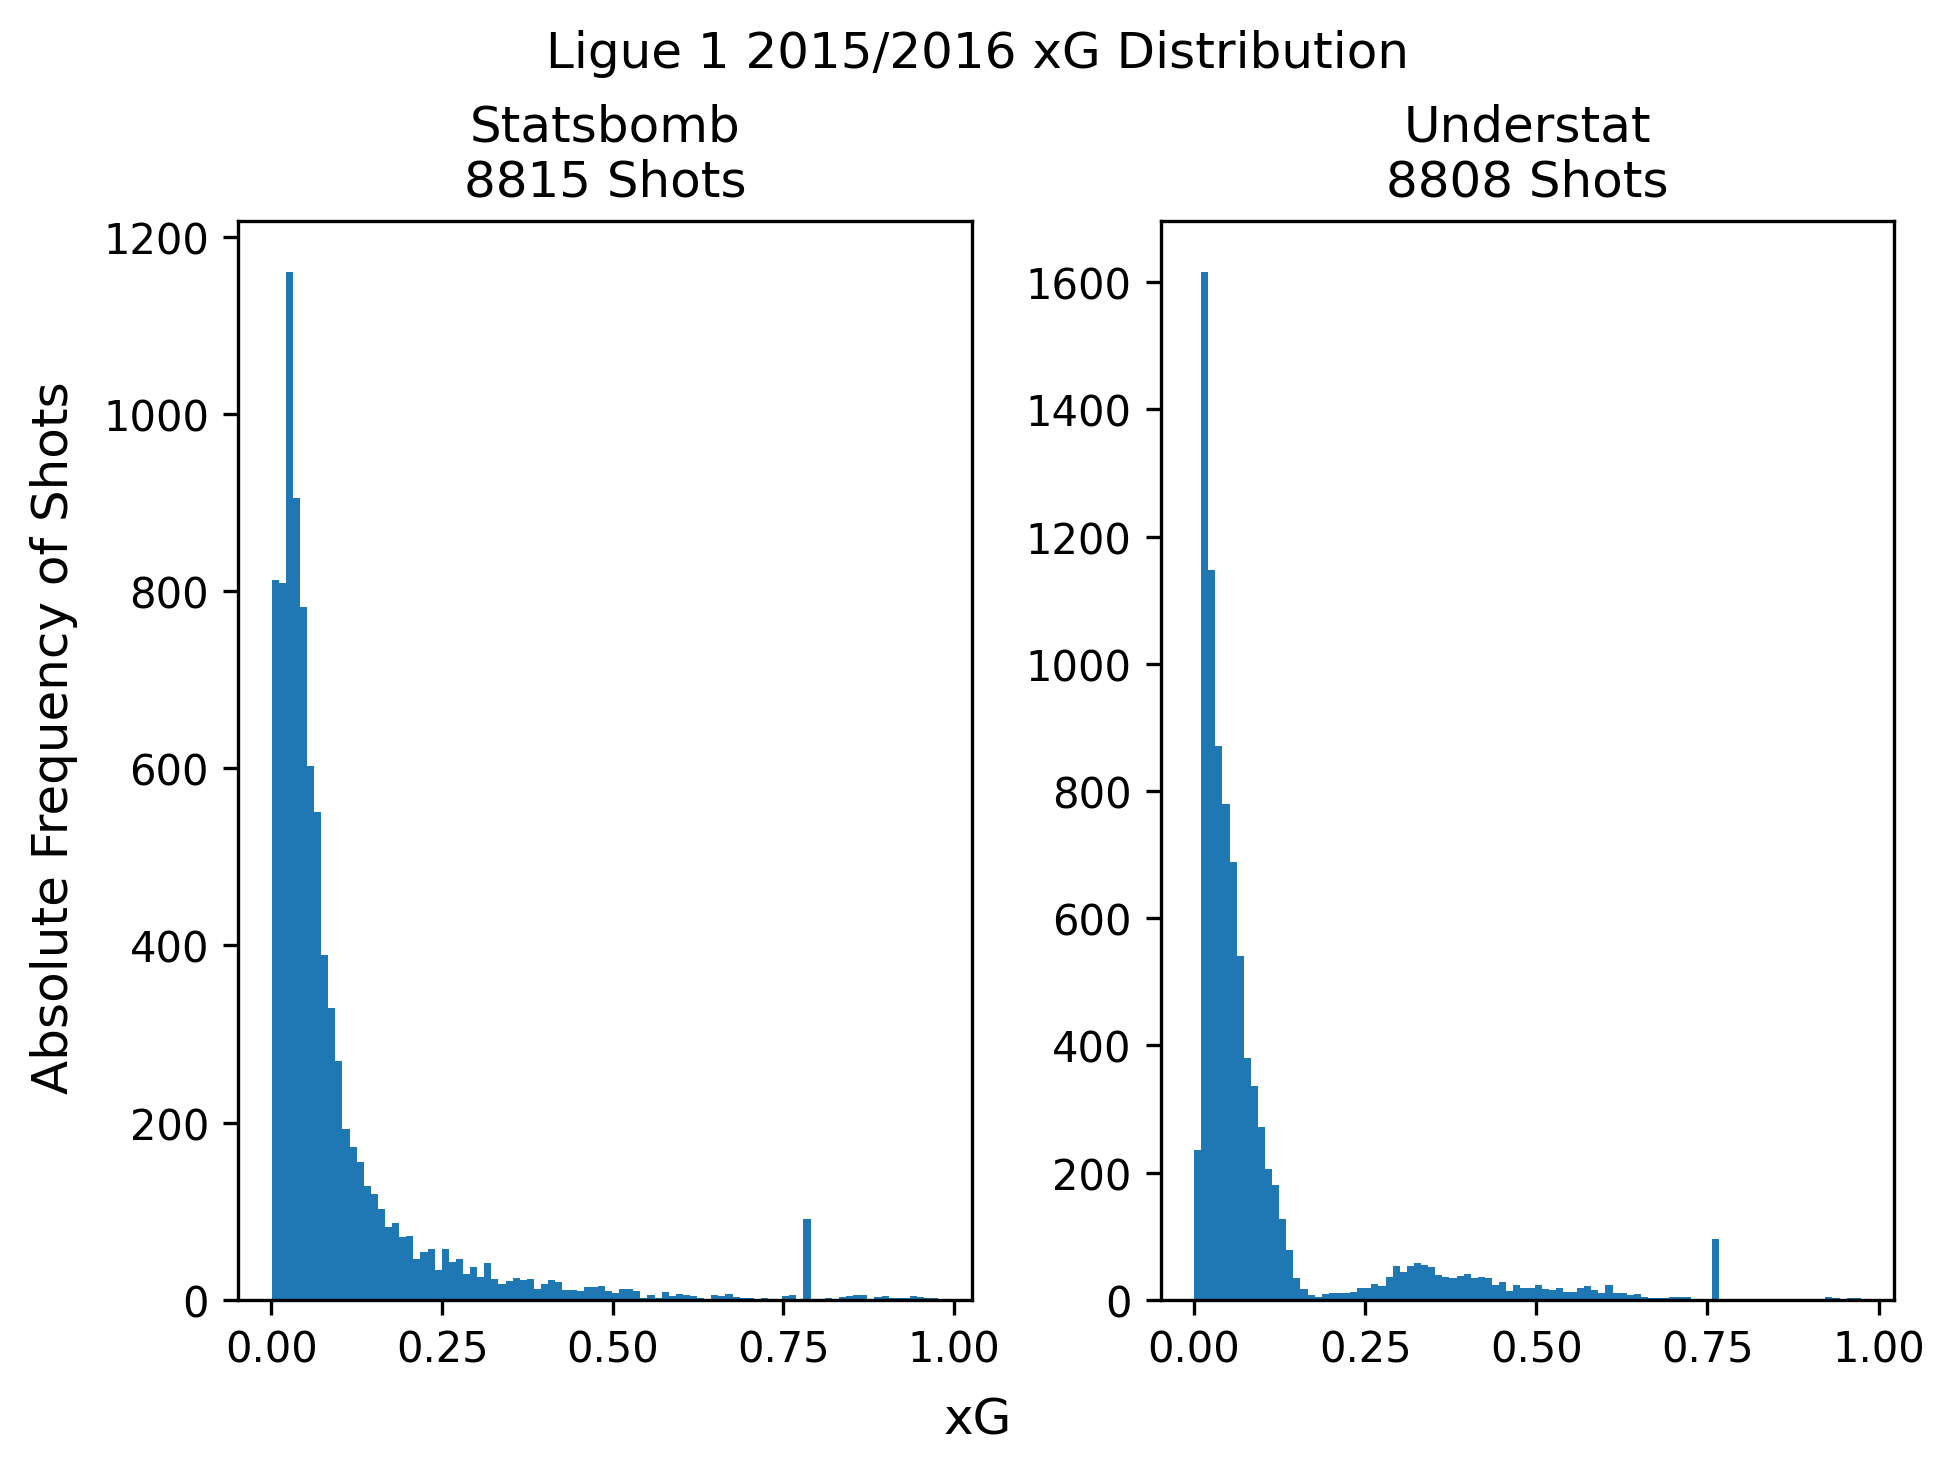

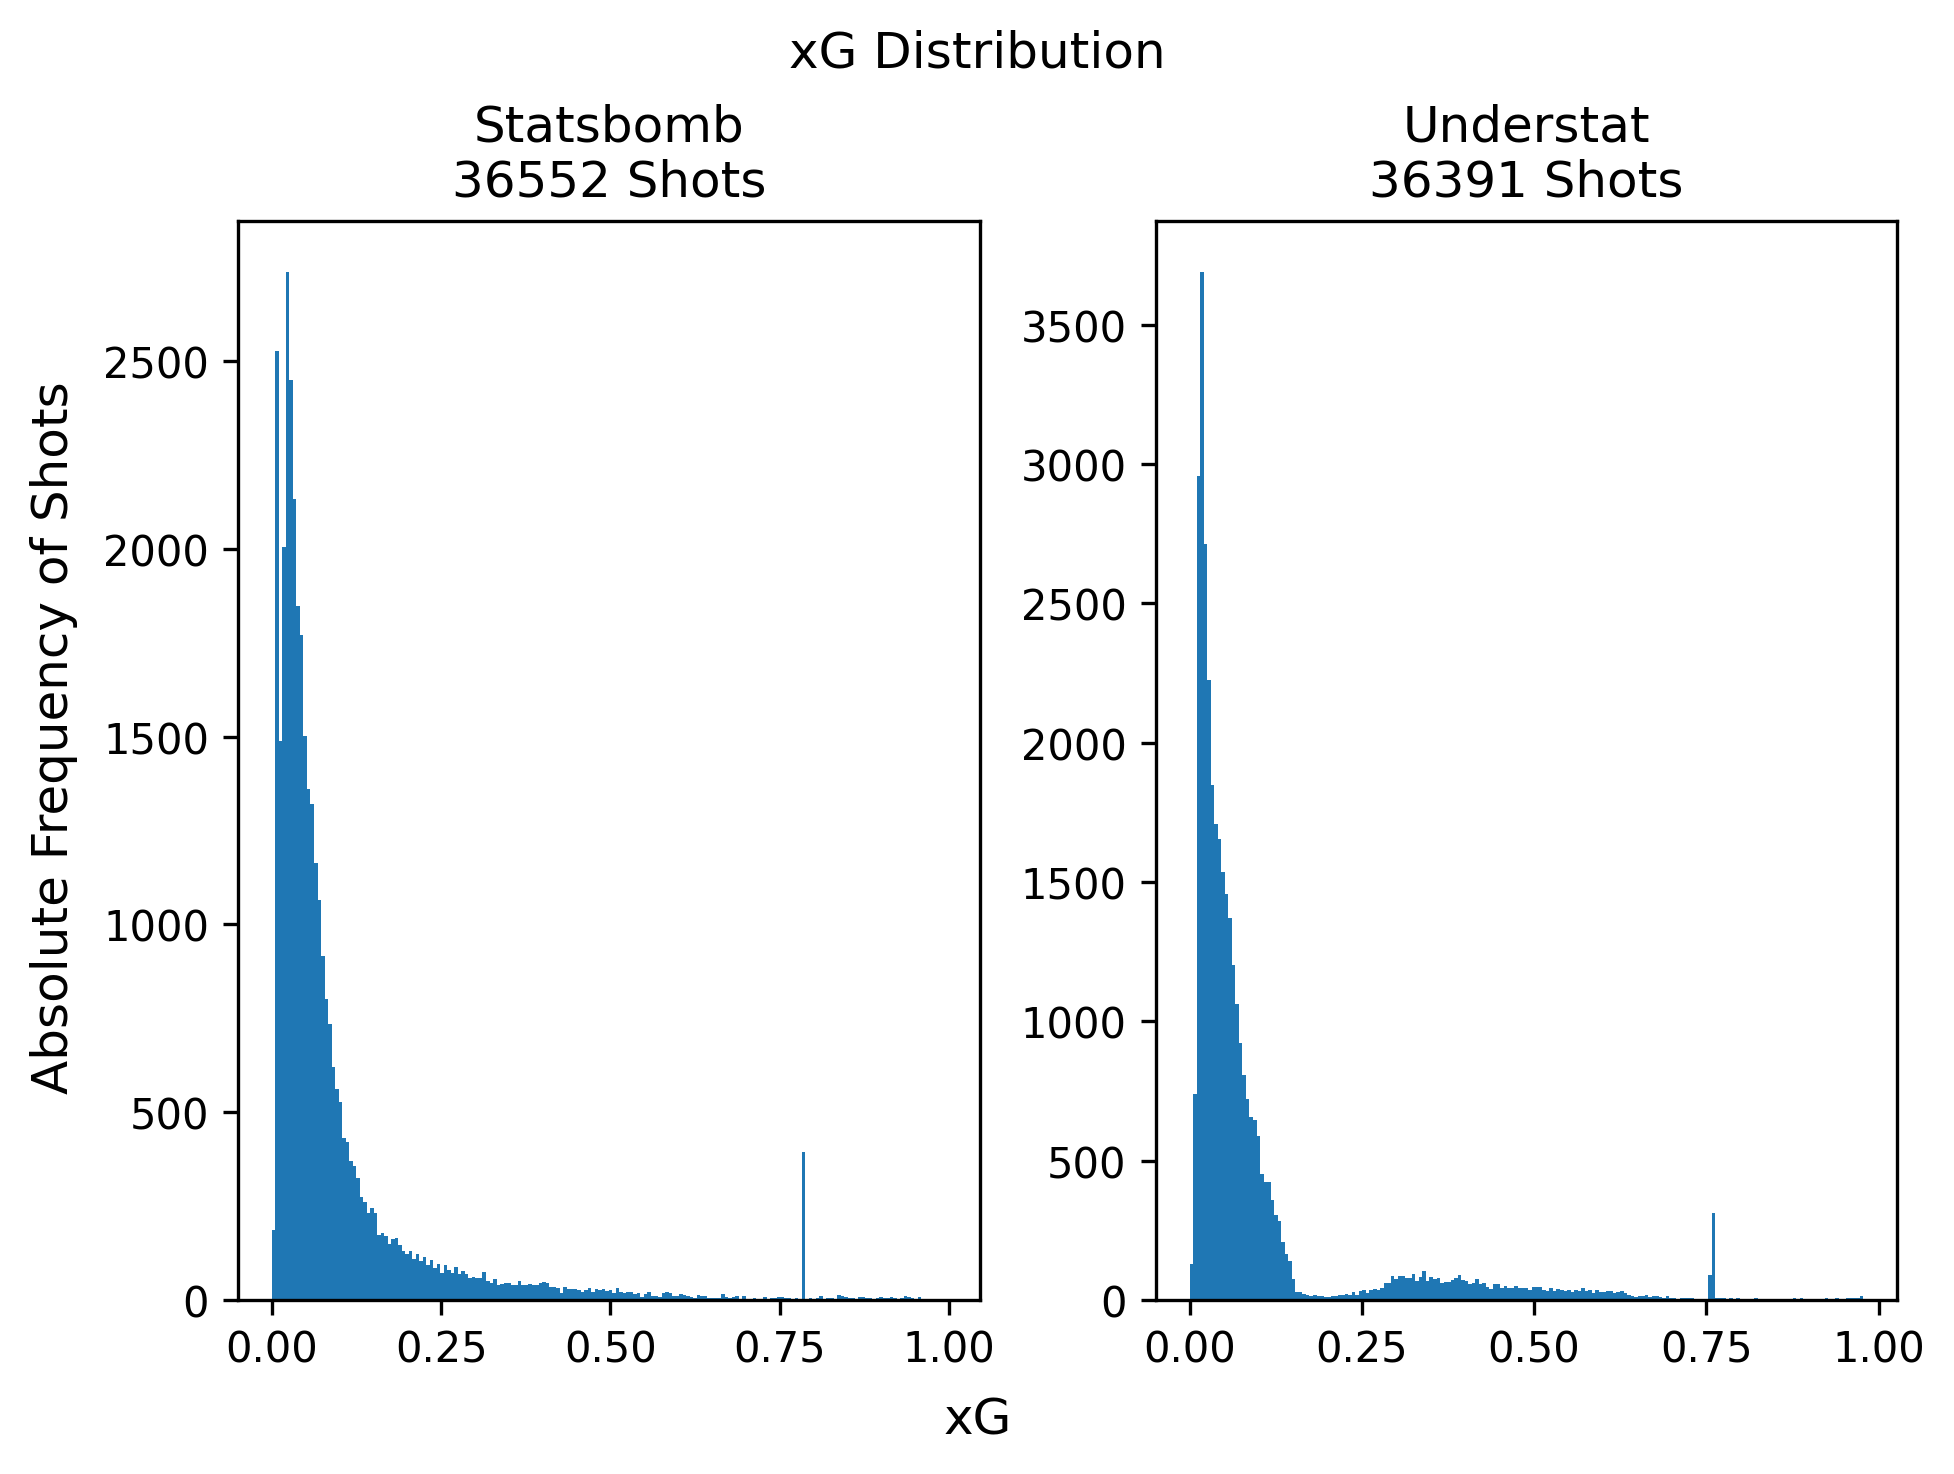

In [7]:
# Get understat formatting for competition names
def statsbomb_to_understat_competition_name(comp_name):
        if comp_name == 'Premier League':
            return 'epl'
        elif comp_name == '1. Bundesliga':
            return 'bundesliga'
        return competition_name.replace(' ', '_').lower()
# # Get match shots of season statsbomb, understat pairs
# def get_season_shots_statsbomb_understat(comp_name, season_name):
#     statsbomb_competitions = sb.competitions()
#     statsbomb_season_id = statsbomb_competitions[(statsbomb_competitions['competition_name'] == comp_name) & (statsbomb_competitions['season_name'] == season_name)]['season_id'].values[0]
#     statsbomb_matches_df = pd.read_csv(f'dataset/intersection/statsbomb_matches_shots/matches_{comp_name}_{statsbomb_season_id}.csv')
#     statsbomb_shots_df = pd.read_csv(f'dataset/intersection/statsbomb_matches_shots/shots_{comp_name}_{statsbomb_season_id}.csv')
#     split_season_name = season_name.split('/')
#     understat_season_name = split_season_name[0][2:] + '-' + split_season_name[1][2:]
#     understat_competition_name = statsbomb_to_understat_competition_name(comp_name)
#     understat_file_path = f'dataset/intersection/understat_matches_shots/shots_{understat_competition_name}_{understat_season_name}.csv'
#     understat_df = pd.read_csv(understat_file_path)
#     season_matches = []
#     for index, row in statsbomb_matches_df.iterrows():
#         match_date = row['match_date']
#         understat_date = match_date
#         def statsbomb_team_to_understat_team(teamname):
#             split_name = teamname.split(' ')
#             if split_name[0] == 'FC' or split_name[0] == 'AFC':
#                 return split_name[1]
#             else:
#                 return split_name[0]
#         understat_home_team = statsbomb_team_to_understat_team(row['home_team'])    
#         curr_understat_df = understat_df[(understat_df['date'].str.contains(understat_date)) & (understat_df['h_team'].str.contains(understat_home_team)) | (understat_df['a_team'].str.contains(understat_home_team))].copy()
#         curr_statsbomb_df = statsbomb_shots_df[statsbomb_shots_df['match_id'] == row['match_id']].copy()
#         if len(curr_understat_df) == 0:
#             print(understat_home_team, understat_date)
#         season_matches.append((curr_statsbomb_df, curr_understat_df))
#     return season_matches

all_statsbomb = []
all_understat = []
for competition_name, season_list in seasons.items():
    for season_name in season_list:
        statsbomb_competitions = sb.competitions()
        statsbomb_season_id = statsbomb_competitions[(statsbomb_competitions['competition_name'] == competition_name) & (statsbomb_competitions['season_name'] == season_name)]['season_id'].values[0]
        statsbomb_season_shots_df = pd.read_csv(f'dataset/intersection/statsbomb_matches_shots/shots_{competition_name}_{statsbomb_season_id}.csv')
        split_season_name = season_name.split('/')
        understat_season_name = split_season_name[0][2:] + '-' + split_season_name[1][2:]
        understat_season_shots_df = pd.read_csv(f'dataset/intersection/understat_matches_shots/shots_{statsbomb_to_understat_competition_name(competition_name)}_{understat_season_name}.csv')
        all_statsbomb.append(statsbomb_season_shots_df)
        all_understat.append(understat_season_shots_df)
        # Plot the xG distribution for the season
        fig, (statsbomb_ax, understat_ax) = plt.subplots(1, 2, layout='constrained')
        fig.dpi = 300
        fig.supxlabel('xG')
        fig.supylabel('Absolute Frequency of Shots')
        fig.suptitle(f'{competition_name} {season_name} xG Distribution')
        bin_amount = lambda x: math.ceil(math.sqrt(len(x)))
        statsbomb_ax.hist(statsbomb_season_shots_df['shot_statsbomb_xg'], bins=bin_amount(statsbomb_season_shots_df))
        statsbomb_ax.set_title(f'Statsbomb\n{len(statsbomb_season_shots_df)} Shots')
        understat_ax.hist(understat_season_shots_df['xG'], bins=bin_amount(understat_season_shots_df))
        understat_ax.set_title(f'Understat\n{len(understat_season_shots_df)} Shots')
        fig.savefig(f'graphs/{competition_name}_{season_name.replace("/", "-")}_xg_distribution.png')
all_statsbomb = pd.concat(all_statsbomb)
all_understat = pd.concat(all_understat)
# Plot the xG distribution for the season
fig, (statsbomb_ax, understat_ax) = plt.subplots(1, 2, layout='constrained')
fig.dpi = 300
fig.supxlabel('xG')
fig.supylabel('Absolute Frequency of Shots')
fig.suptitle(f'xG Distribution')
bin_amount = lambda x: math.ceil(math.sqrt(len(x)))
statsbomb_ax.hist(all_statsbomb['shot_statsbomb_xg'], bins=bin_amount(all_statsbomb))
statsbomb_ax.set_title(f'Statsbomb\n{len(all_statsbomb)} Shots')
understat_ax.hist(all_understat['xG'], bins=bin_amount(all_understat))
understat_ax.set_title(f'Understat\n{len(all_understat)} Shots')
fig.savefig(f'graphs/all_xg_distribution.png')

In [8]:
mean_statsbomb_xg = all_statsbomb['shot_statsbomb_xg'].mean()
mean_understat_xg = all_understat['xG'].mean()
print(f'Statsbomb mean xG: {mean_statsbomb_xg}')
print(f'Understat mean xG: {mean_understat_xg}')
median_statsbomb_xg = all_statsbomb['shot_statsbomb_xg'].median()
median_understat_xg = all_understat['xG'].median()
print(f'Statsbomb median xG: {median_statsbomb_xg}')
print(f'Understat median xG: {median_understat_xg}')
variance_statsbomb_xg = all_statsbomb['shot_statsbomb_xg'].var()
variance_understat_xg = all_understat['xG'].var()
print(f'Statsbomb variance xG: {variance_statsbomb_xg}')
print(f'Understat variance xG: {variance_understat_xg}')
print(f'Statsbomb standard deviation xG: {math.sqrt(variance_statsbomb_xg)}')
print(f'Understat standard deviation xG: {math.sqrt(variance_understat_xg)}')

Statsbomb mean xG: 0.0984384322742285
Understat mean xG: 0.1036390906000399
Statsbomb median xG: 0.050603875
Understat median xG: 0.0477632656693458
Statsbomb variance xG: 0.019729970692841086
Understat variance xG: 0.024090796686108872
Statsbomb standard deviation xG: 0.14046341407228105
Understat standard deviation xG: 0.15521210225400878


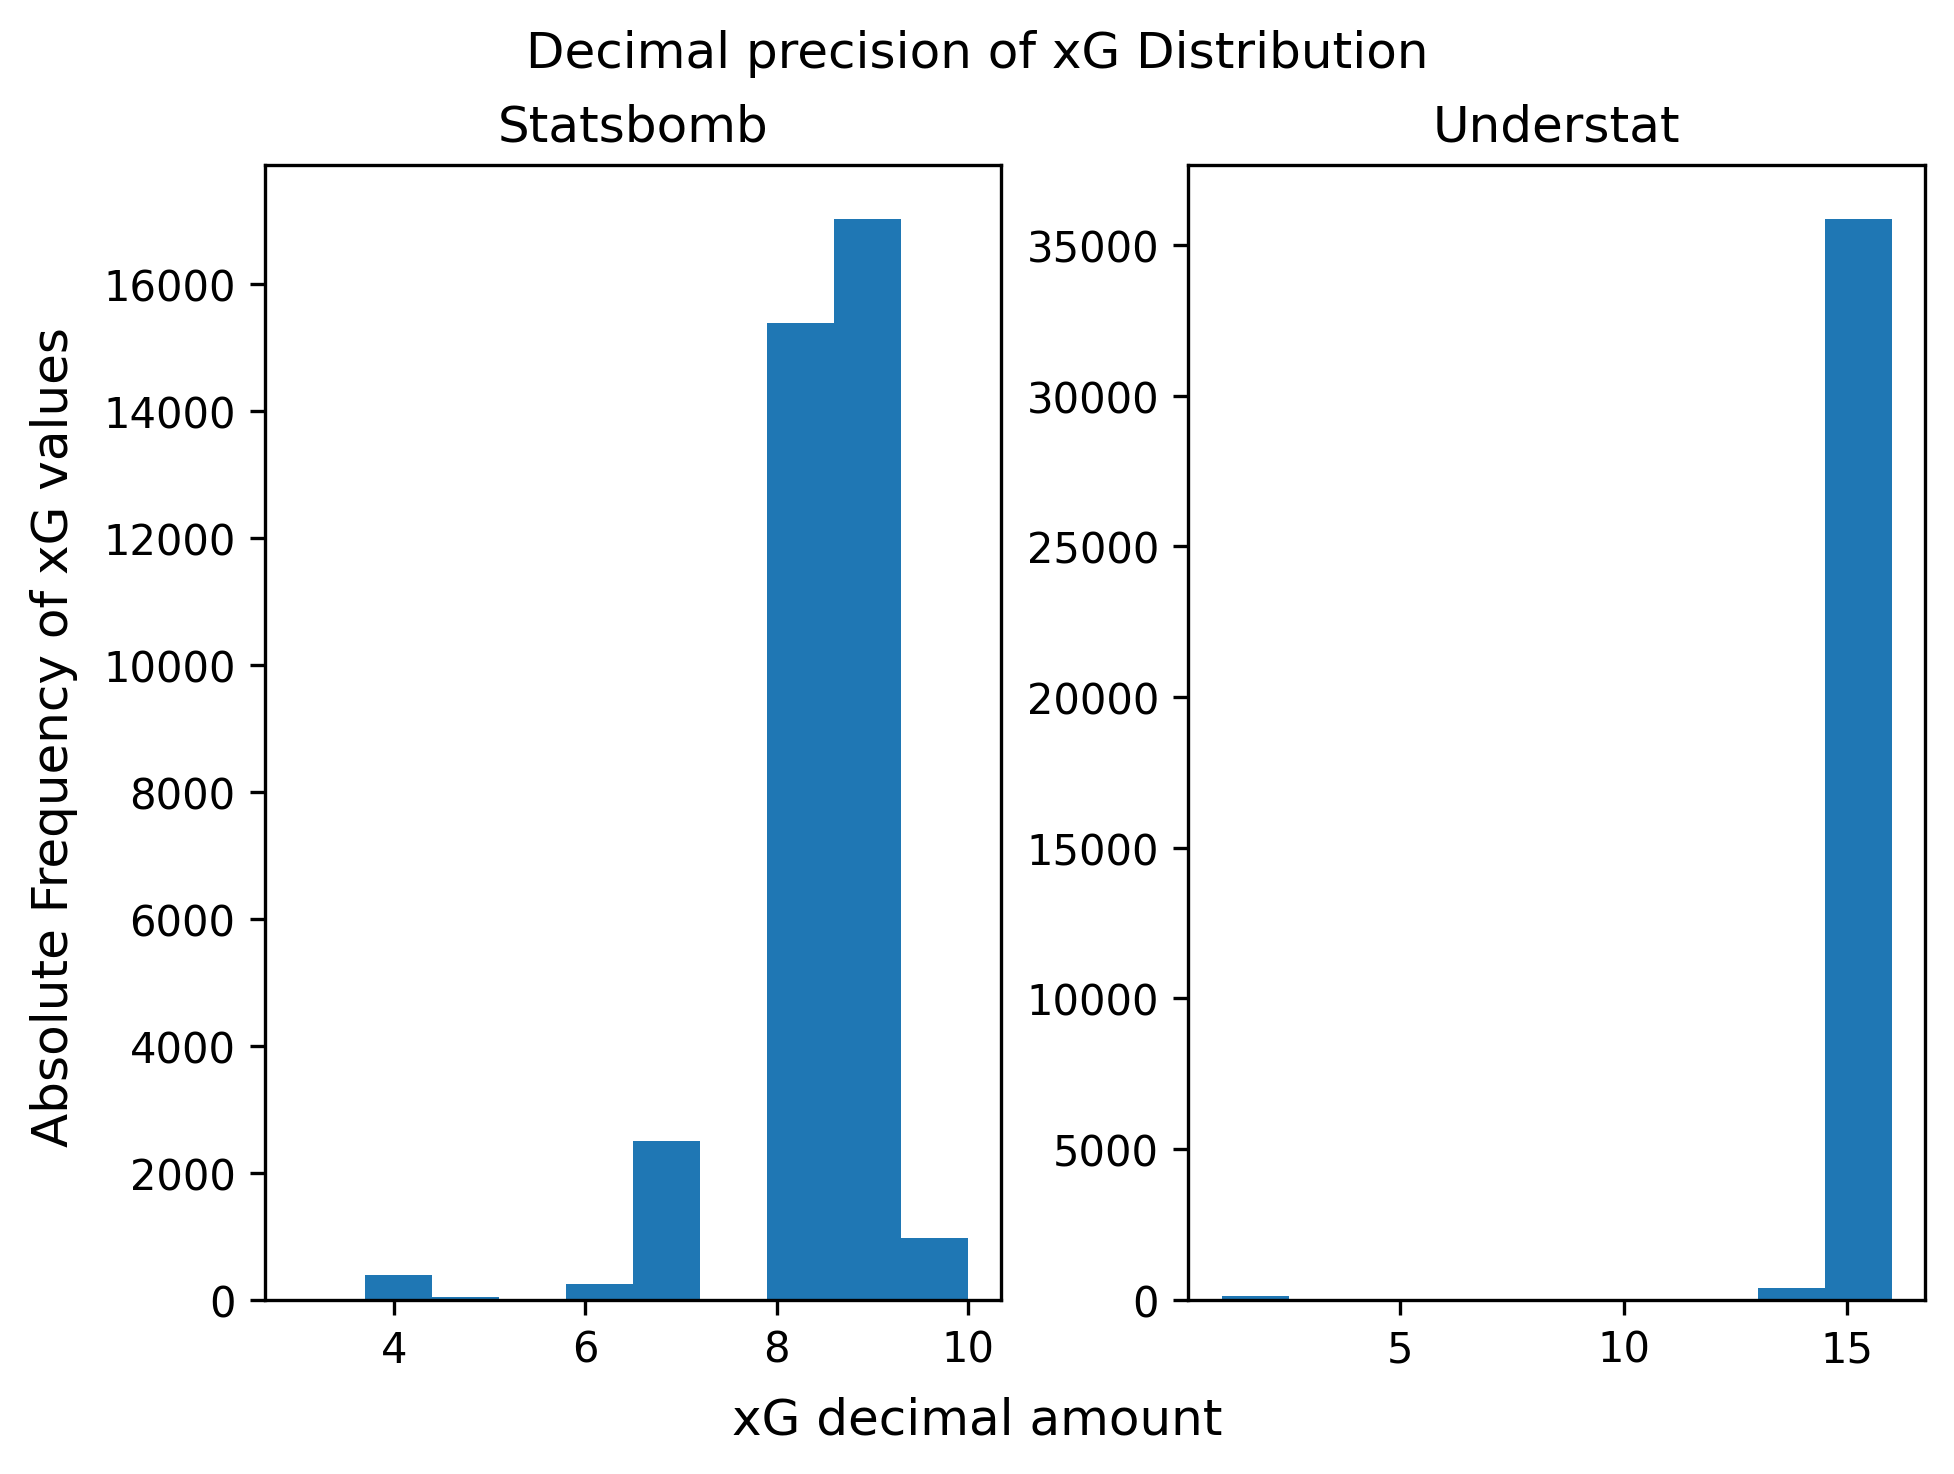

In [9]:
all_statsbomb['xG_strlen'] = all_statsbomb['shot_statsbomb_xg'].apply(lambda x: len(str(x))-2)
all_understat['xG_strlen'] = all_understat['xG'].apply(lambda x: len(str(x))-2)
fig, (statsbomb_ax, understat_ax) = plt.subplots(1, 2, layout='constrained')
fig.dpi = 300
fig.suptitle(f'Decimal precision of xG Distribution')
fig.supxlabel('xG decimal amount')
fig.supylabel('Absolute Frequency of xG values')
statsbomb_ax.hist(all_statsbomb['xG_strlen'])
statsbomb_ax.set_title(f'Statsbomb')
understat_ax.hist(all_understat['xG_strlen'])
understat_ax.set_title(f'Understat')
fig.savefig(f'graphs/all_xg_decimal_precision_distribution.png')

In [10]:
print(all_statsbomb.columns)
print(all_understat.columns)

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'shot_statsbomb_xg', 'shot_end_location', 'shot_key_pass_id',
       'shot_technique', 'shot_body_part', 'shot_outcome', 'shot_type',
       'shot_freeze_frame', 'possession_team_id', 'team_id', 'player_id',
       'under_pressure', 'shot_first_time', 'shot_one_on_one',
       'shot_aerial_won', 'shot_open_goal', 'shot_saved_off_target', 'out',
       'shot_saved_to_post', 'shot_redirect', 'shot_deflected', 'off_camera',
       'shot_follows_dribble', 'xG_strlen'],
      dtype='object')
Index(['id', 'minute', 'result', 'X', 'Y', 'xG', 'player', 'h_a', 'player_id',
       'situation', 'season', 'shotType', 'match_id', 'h_team', 'a_team',
       'h_goals', 'a_goals', 'date', 'player_assisted', 'lastAction',
       'xG_strlen'],
      dtype='object')


In [11]:
with open('statsbomb_all_teams.txt', 'w') as f:
    f.write('\n'.join(all_statsbomb['team'].unique()))
with open('understat_all_teams.txt', 'w') as f:
    f.write('\n'.join(pd.concat([all_understat['h_team'], all_understat['a_team']]).unique()))

In [12]:
statsbomb_teamname_to_understat_teamname = {
'AFC Bournemouth': 'Bournemouth',
'Leicester City': 'Leicester',
'Sunderland': 'Sunderland',
'West Bromwich Albion': 'West Bromwich Albion',
'Aston Villa': 'Aston Villa',
'Newcastle United': 'Newcastle United',
'Everton': 'Everton',
'Crystal Palace': 'Crystal Palace',
'Watford': 'Watford',
'Arsenal': 'Arsenal',
'Liverpool': 'Liverpool',
'Tottenham Hotspur': 'Tottenham',
'Manchester City': 'Manchester City',
'Norwich City': 'Norwich',
'Chelsea': 'Chelsea',
'Stoke City': 'Stoke',
'Manchester United': 'Manchester United',
'West Ham United': 'West Ham',
'Swansea City': 'Swansea',
'Southampton': 'Southampton',
'Hoffenheim': 'Hoffenheim',
'Schalke 04': 'Schalke 04',
'Bayern Munich': 'Bayern Munich',
'Eintracht Frankfurt': 'Eintracht Frankfurt',
'Hertha Berlin': 'Hertha Berlin',
'Hannover 96': 'Hannover 96',
'Darmstadt 98': 'Darmstadt',
'Hamburger SV': 'Hamburger SV',
'FSV Mainz 05': 'Mainz 05',
'Borussia Dortmund': 'Borussia Dortmund',
'Wolfsburg': 'Wolfsburg',
'VfB Stuttgart': 'VfB Stuttgart',
'Augsburg': 'Augsburg',
'Werder Bremen': 'Werder Bremen',
'Ingolstadt': 'Ingolstadt',
'Bayer Leverkusen': 'Bayer Leverkusen',
'FC Köln': 'FC Cologne',
'Borussia Mönchengladbach': 'Borussia M.Gladbach',
'Udinese': 'Udinese',
'Atalanta': 'Atalanta',
'Frosinone': 'Frosinone',
'Torino': 'Torino',
'Napoli': 'Napoli',
'Inter Milan': 'AC Milan',
'Lazio': 'Lazio',
'Empoli': 'Empoli',
'Fiorentina': 'Fiorentina',
'AS Roma': 'Roma',
'Sassuolo': 'Sassuolo',
'Bologna': 'Bologna',
'Sampdoria': 'Sampdoria',
'AC Milan': 'AC Milan',
'Chievo': 'Chievo',
'Juventus': 'Juventus',
'Hellas Verona': 'Verona',
'Palermo': 'Palermo',
'Genoa': 'Genoa',
'Carpi': 'Carpi',
'Lorient': 'Lorient',
'Marseille': 'Marseille',
'Gazélec Ajaccio': 'GFC Ajaccio',
'Nantes': 'Nantes',
'Saint-Étienne': 'Saint-Etienne',
'Troyes': 'Troyes',
'Bastia': 'SC Bastia',
'Rennes': 'Rennes',
'Bordeaux': 'Bordeaux',
'Lyon': 'Lyon',
'AS Monaco': 'Monaco',
'Guingamp': 'Guingamp',
'Paris Saint-Germain': 'Paris Saint Germain',
'Angers': 'Angers',
'Montpellier': 'Montpellier',
'Toulouse': 'Toulouse',
'Stade de Reims': 'Reims',
'Lille': 'Lille',
'Caen': 'Caen',
'OGC Nice': 'Nice'
}

In [13]:
def convert_statsbomb_date_to_understat_date(league_season, date):
    offset = 0
    if league_season == 'Premier League':
        pass
    elif league_season == 'Germany - 1. Bundesliga':
        offset = 2
    elif league_season == 'Serie A':
        return date
    elif league_season == 'Ligue 1':
        return date
    elif league_season == 'La Liga':
        return date

In [18]:
matches_bundesliga_sb = pd.read_csv('dataset/intersection/statsbomb_matches_shots/matches_1. Bundesliga_27.csv')
matches_bundesliga_us = pd.read_csv('dataset/intersection/understat_matches_shots/shots_bundesliga_15-16.csv')

In [ ]:
import datetime
matches_bundesliga_sb['datetime'] = matches_bundesliga_sb['match_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))